# Diagrama de Gantt para seguimiento de un proyectos

### Campos del dataset:

- Etapa del proyecto.
- Tarea a realizar.
- Fecha de inicio de la tarea.
- Fecha de fin de la tarea.
- Porcentaje de la tarea que ya se completó.

Se podría agregar un campo con una descripción completa de la tarea a realizar

In [22]:
import pandas as pd
df = pd.DataFrame()

df['Etapa'] = ['Concepción e inicio del proyecto', 'Definición y planificación', 'MVP1', 'MVP1', 'MVP2','MVP2', 'Presentación de resultados', 'Cierre del proyecto']
df['Tarea'] = ['task1', 'task2', 'task3', 'task4', 'task5', 'task6', 'task7', 'task8']
df['FechaInicio'] = ['1/01/2021','8/01/2021','15/01/2021','18/01/2021','20/01/2021','27/01/2021','2/02/2021','10/02/2021']
df['FechaFin'] = ['7/01/2021','15/01/2021','21/01/2021','25/01/2021','28/01/2021','2/02/2021','10/02/2021','12/02/2021']
df['Pct_completo']=[1,1, 0.9, 0.75, 0.6, 0.45, 0.3, 0.2]
df

,Etapa,Tarea,FechaInicio,FechaFin,Pct_completo
0,Concepción e inicio del proyecto,task1,1/01/2021,7/01/2021,1.00
1,Definición y planificación,task2,8/01/2021,15/01/2021,1.00
2,MVP1,task3,15/01/2021,21/01/2021,0.90
3,MVP1,task4,18/01/2021,25/01/2021,0.75
4,MVP2,task5,20/01/2021,28/01/2021,0.60
5,MVP2,task6,27/01/2021,2/02/2021,0.45
6,Presentación de resultados,task7,2/02/2021,10/02/2021,0.30
7,Cierre del proyecto,task8,10/02/2021,12/02/2021,0.20


- Le doy formato datetime a las fechas de inicio y fin de cada tarea.
- Calculo la cantidad de días que me lleva realizar cada tarea.
- Asigno un color para cada una de las etapas del proyecto.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
df['Start']=[dt.strptime(a, '%d/%m/%Y') for a in df['FechaInicio']]
df['End']=[dt.strptime(a, '%d/%m/%Y') for a in df['FechaFin']]
# project start date
proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# create a column with the color for each project
def color(row):
    c_dict = {'Concepción e inicio del proyecto':'#E64646', 'Definición y planificación':'#E69646', 
              'MVP1':'#34D05C', 'MVP2':'#34D0C3', 'Presentación de resultados':'#3475D0', 'Cierre del proyecto':'#c51b7d'}
    return c_dict[row['Etapa']]

df['color'] = df.apply(color, axis=1)
# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Pct_completo)
df

,Etapa,Tarea,FechaInicio,FechaFin,Pct_completo,Start,End,start_num,end_num,days_start_to_end,color,current_num
0,Concepción e inicio del proyecto,task1,1/01/2021,7/01/2021,1.00,2021-01-01,2021-01-07,0,6,6,#E64646,6.00
1,Definición y planificación,task2,8/01/2021,15/01/2021,1.00,2021-01-08,2021-01-15,7,14,7,#E69646,7.00
2,MVP1,task3,15/01/2021,21/01/2021,0.90,2021-01-15,2021-01-21,14,20,6,#34D05C,5.40
3,MVP1,task4,18/01/2021,25/01/2021,0.75,2021-01-18,2021-01-25,17,24,7,#34D05C,5.25
4,MVP2,task5,20/01/2021,28/01/2021,0.60,2021-01-20,2021-01-28,19,27,8,#34D0C3,4.80
5,MVP2,task6,27/01/2021,2/02/2021,0.45,2021-01-27,2021-02-02,26,32,6,#34D0C3,2.70
6,Presentación de resultados,task7,2/02/2021,10/02/2021,0.30,2021-02-02,2021-02-10,32,40,8,#3475D0,2.40
7,Cierre del proyecto,task8,10/02/2021,12/02/2021,0.20,2021-02-10,2021-02-12,40,42,2,#c51b7d,0.40


### Gráfico para el seguimiento del proyecto

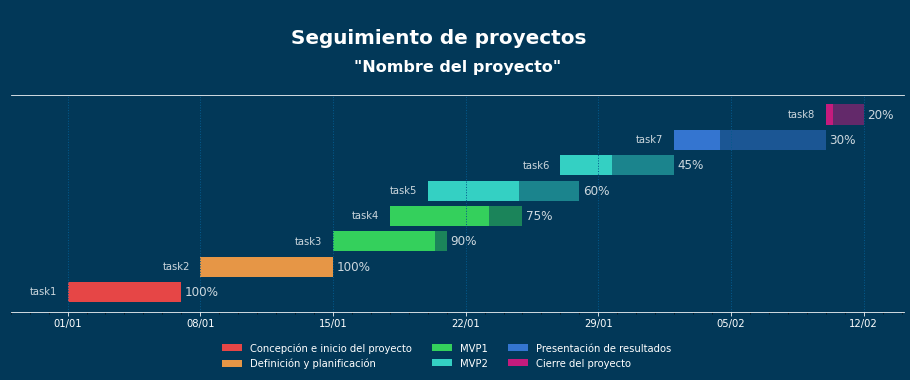

In [32]:
from matplotlib.patches import Patch 
fig, ax = plt.subplots(1, figsize=(16,4))

# bars
ax.barh(df.Tarea, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Tarea, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

# texts
for idx, row in df.iterrows():
    ax.text(row.end_num+0.2, idx, 
            f"{int(row.Pct_completo*100)}%", 
            va='center', alpha=0.8,  fontsize = 12, color='white')
    ax.text(row.start_num-2, idx, 
            f"{row.Tarea}", 
            va='center', alpha=0.8, fontsize = 10, color='white' )

##### LEGENDS #####
c_dict = {'Concepción e inicio del proyecto':'#E64646', 'Definición y planificación':'#E69646', 
          'MVP1':'#34D05C', 'MVP2':'#34D0C3', 'Presentación de resultados':'#3475D0', 'Cierre del proyecto':'#c51b7d'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
legend = plt.legend(handles=legend_elements, bbox_to_anchor =(0.75, -0.1), ncol = 3)
plt.setp(legend.get_texts(), color='white')
frame = legend.get_frame()
frame.set_color('#023858')

##### TITLE #####
plt.suptitle('\nSeguimiento de proyectos \n',fontsize = 20, fontweight = "bold",verticalalignment= 'baseline',
             horizontalalignment='center', color='white')

plt.title(label='"Nombre del proyecto"\n',fontdict = {'fontsize': 16, 'fontweight':"bold", 'verticalalignment': 'baseline',
                                               'horizontalalignment': 'center', 'color':'white'})

##### TICKS #####

# Asigno marcas en el eje x cada 7 días
xticks = np.arange(0, df.end_num.max()+1, 7)
ax.set_xticks(xticks)

# Asigno el formato de fecha que quiero ver para esas marcas
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%d/%m")
ax.set_xticklabels(xticks_labels[::7])

# Quiero que el gráfico inicie 3 días antes de la fecha de la primer tarea y finalice 3 días después de la fecha de la última tarea.
xticks_minor = np.arange(df.start_num.min()-3, df.end_num.max()+3, 1)
ax.set_xticks(xticks_minor, minor=True)

#especifico el color de fondo del gráfico
fig.set_facecolor('#023858')
#fig.set_alpha(0.6)
ax.set_facecolor('#023858')

# especifico los colores de los ejes
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('#023858')
ax.spines['right'].set_color('#023858')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')

ax.get_yaxis().set_visible(False) #Elimino los nombres del eje y

#especifico que quiero grillas verticales en un determinado color
ax.grid(axis='x', #solo lineas verticales
        color='#045a8d', 
        linestyle='dotted', linewidth=1) #linea de puntos y tamaño 1)

plt.show()